# Artificial Intelligence of Things - Demonstration

This document describes methods and mechanisms for the execution of
Artificial Neural Networks in devices with low computational power.

## Load dataset

In [1]:
import src.dataset.yalefaces as yalefaces

In [2]:
import numpy as np
X, y = yalefaces.load("data/yalefaces", flatten=True)
X = X.astype("float32") / 255.0

print(f"Loaded {int(X.shape[0]/len(np.unique(y)))} faces from {len(np.unique(y))} individuals,"
f" a total of {X.shape[0]} images of size {yalefaces.SHAPE} ({X[0].shape[0]} pixels).")

Loaded 11 faces from 15 individuals, a total of 165 images of size (243, 320) (77760 pixels).


In [3]:
# yalefaces.plot_subset(X, y, subjects=[3,0,8,10], num_samples=11)

## Dataset: analysis and pre-processing

### Image size and format

In [4]:
randomface = X[0]
# yalefaces.plot_face(randomface)

### Pixel importance from the Chi-squared score

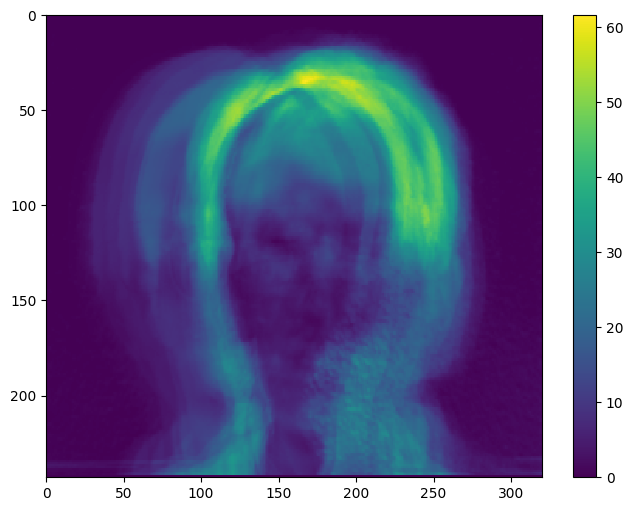

In [5]:
yalefaces.plot_pixel_importance(X, y)

### Image compression using Principal Component Analysis (PCA)
#### Compute eigenfaces using PCA

In [6]:
from sklearn.decomposition import PCA

num_faces, num_pixels = X.shape
num_principal_components = int(num_faces)

pca = PCA(n_components=num_principal_components)
pca.fit(X)

print(f"PCA generated {num_principal_components} eigenfaces of size {yalefaces.SHAPE}.")

PCA generated 165 eigenfaces of size (243, 320).


#### Plot eigenfaces (head, middle and tail)

<Figure size 640x480 with 0 Axes>

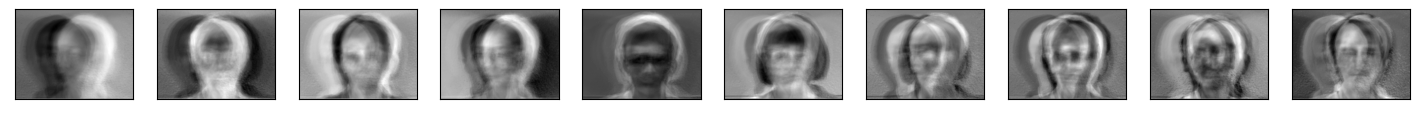

<Figure size 640x480 with 0 Axes>

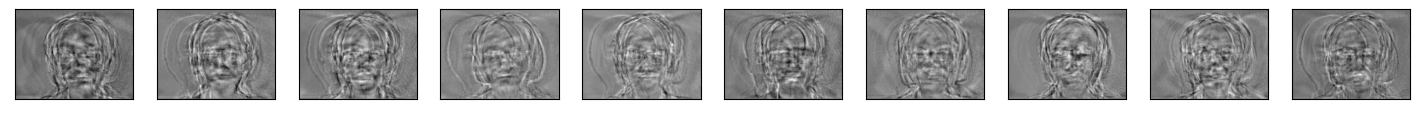

<Figure size 640x480 with 0 Axes>

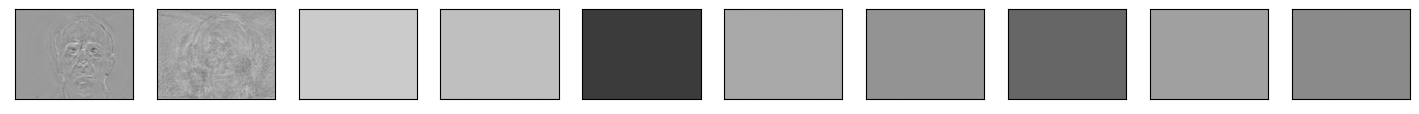

In [7]:
yalefaces.plot_eigenfaces(pca.components_[0:10])
yalefaces.plot_eigenfaces(pca.components_[80:90])
yalefaces.plot_eigenfaces(pca.components_[154:164])

#### Compress images using eigenfaces

In [9]:
X_compressed = pca.transform(X)

#### Compare original and compressed

<Figure size 640x480 with 0 Axes>

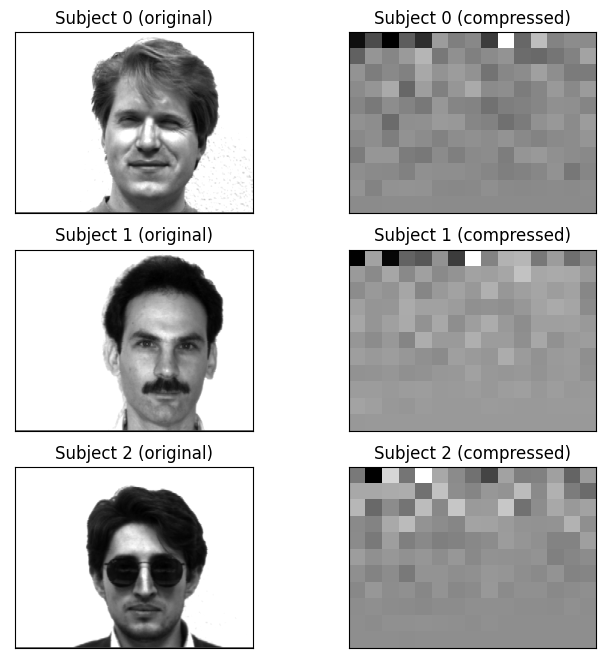

In [10]:
yalefaces.plot_compressed(X, X_compressed, y)

## Train MLP

In [9]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [12]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
model = mlp(layers_sizes=[100, 50, 30, 10], activations=["tanh", "tanh", "tanh", "softmax"])